In [1]:
# Dependencies:
import pandas as pd
from pathlib import Path
from matplotlib.pyplot import figure
import numpy as np


# Visualizations:
import matplotlib.pyplot as plt
import seaborn as sb

# Supress Warnings
import warnings
warnings.simplefilter(action = "ignore")

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
data = Path("Resources/clean_flight_data.csv")
data_df = pd.read_csv(data)

# Review the DataFrame and hide the default index
data_df.head().style.hide()

DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DEL15,DEP_TIME_BLK,ARR_DEL15,DISTANCE
1,3,EV,ORD,GRB,0.000000,1000-1059,0.000000,174.000000
1,3,EV,TUL,ORD,0.000000,1000-1059,0.000000,585.000000
1,3,EV,EWR,TYS,0.000000,1800-1859,0.000000,631.000000
1,3,EV,BTR,IAH,0.000000,1800-1859,0.000000,253.000000
1,3,EV,RIC,IAH,0.000000,1000-1059,0.000000,1157.000000


### Description of headers in the dataframe:
* `DAY_OF_MONTH:` Calendar Day of Month
* `DAY_OF_WEEK:` Day of Week
* `OP_UNIQUE_CARRIER:` Unique Scheduled Operating Carrier Code. When multiple carriers have used the same code, a numeric suffix is used for earlier users, for example, PA, PA(1), PA(2). Use this field for analysis across a range of years.
* `ORIGIN:` Origin Airport
* `DEST:` Destination Airport
* `DEP_DEL15:` Departure Delay Indicator, 15 Minutes or More (1=Yes)
* `DEP_TIME_BLK:` CRS Departure Time Block, Hourly Intervals
* `ARR_DEL15:` Arrival Delay Indicator, 15 Minutes or More (1=Yes)
* `DISTANCE:` Distance between airports (miles)

In [3]:
# Describe the data types within the header:
data_df.dtypes

DAY_OF_MONTH           int64
DAY_OF_WEEK            int64
OP_UNIQUE_CARRIER     object
ORIGIN                object
DEST                  object
DEP_DEL15            float64
DEP_TIME_BLK          object
ARR_DEL15            float64
DISTANCE             float64
dtype: object

In [4]:
# Since OP_UNIQUE_CARRIER, ORIGIN, DEST, DEP_TIME_BLK, DEP_DEL15 are categorical variables,
# transforming them to category object is necessary.
cat_col = ['OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'DEP_DEL15', 'DEP_TIME_BLK']

for col in cat_col:
  data_df[col] = data_df[col].astype('category')

# Review the DataFrame and hide the default index
data_df.head().style.hide()

DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DEL15,DEP_TIME_BLK,ARR_DEL15,DISTANCE
1,3,EV,ORD,GRB,0.000000,1000-1059,0.000000,174.000000
1,3,EV,TUL,ORD,0.000000,1000-1059,0.000000,585.000000
1,3,EV,EWR,TYS,0.000000,1800-1859,0.000000,631.000000
1,3,EV,BTR,IAH,0.000000,1800-1859,0.000000,253.000000
1,3,EV,RIC,IAH,0.000000,1000-1059,0.000000,1157.000000


In [5]:
# Checking the dataframe after preprocessing (Sanity check to check if the variables are categorized or not.)
pd.DataFrame({'missing': data_df.isna().mean()*100, 'type':data_df.dtypes})

,missing,type
DAY_OF_MONTH,0.0,int64
DAY_OF_WEEK,0.0,int64
OP_UNIQUE_CARRIER,0.0,category
ORIGIN,0.0,category
DEST,0.0,category
DEP_DEL15,0.0,category
DEP_TIME_BLK,0.0,category
ARR_DEL15,0.0,float64
DISTANCE,0.0,float64


In [6]:
# Changing the data type from integer to string for plotting:
data_df['DAY_OF_WEEK'] = data_df['DAY_OF_WEEK'].astype(str)

In [7]:
# Use pandas cut function to create categorical buckets for a distance of flight to reduce computational resources required
data_df['DISTANCE_cat'] = pd.qcut(data_df['DISTANCE'], q = 4)

In [8]:
# Busiest aiports by origin:
busiest_airports = data_df['ORIGIN'].value_counts().nlargest(10)
busiest_airports
airports = []
for key in busiest_airports.keys():
    airports.append(key)
airports

['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'PHX', 'IAH', 'LAS', 'LGA']

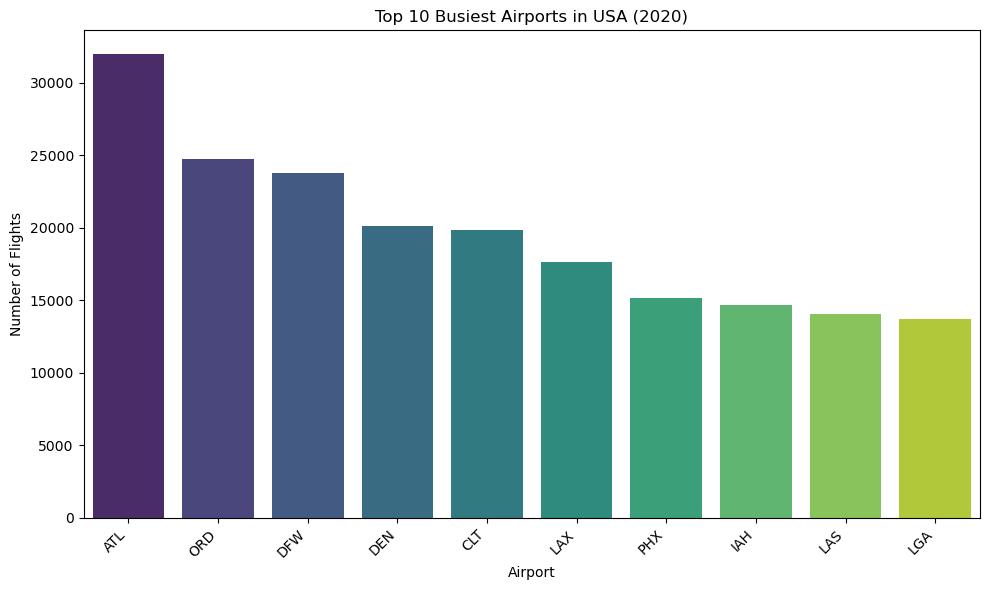

In [9]:
# Plot: 1 Barplot shows top ten busiest airports in USA:
plt.figure(figsize=(10, 6))
sb.barplot(x=airports, y=busiest_airports.values, palette='viridis')
plt.title('Top 10 Busiest Airports in USA (2020)')
plt.xlabel('Airport')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

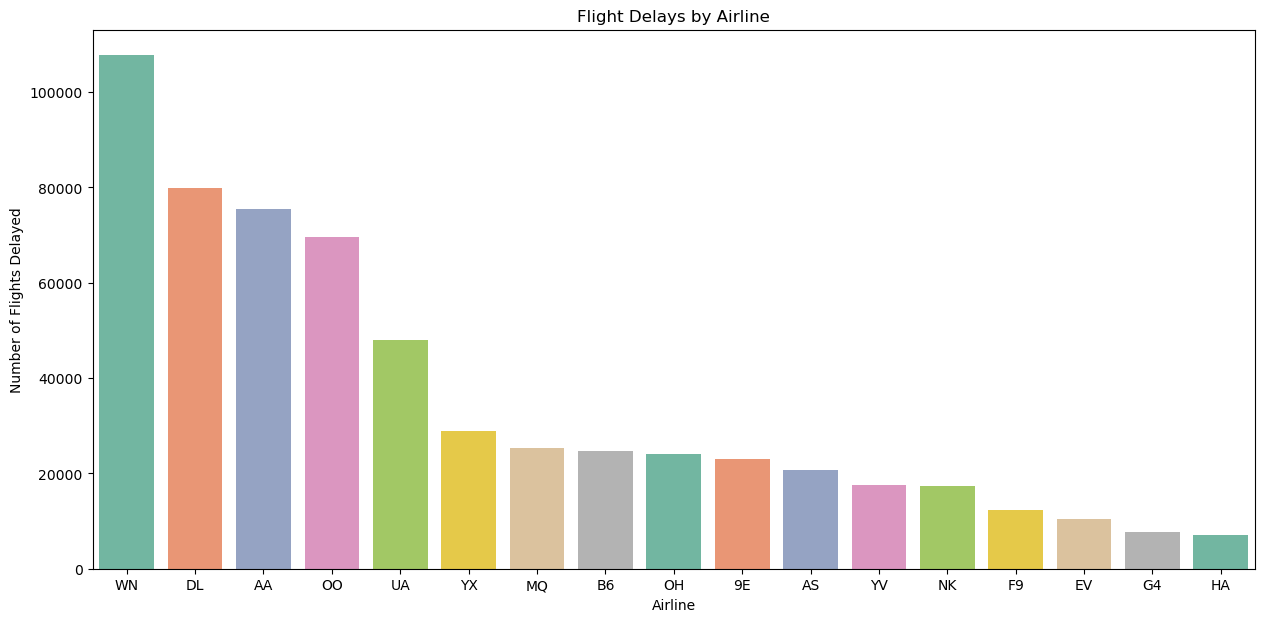

In [10]:
# Plot 2:  Countplot that shows the total number of flights delayed by the Airline
plt.figure(figsize=(15, 7))
sb.countplot(x ='OP_UNIQUE_CARRIER', data = data_df, order = data_df['OP_UNIQUE_CARRIER'].value_counts().index, palette = "Set2")
plt.title('Flight Delays by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights Delayed')
plt.show()

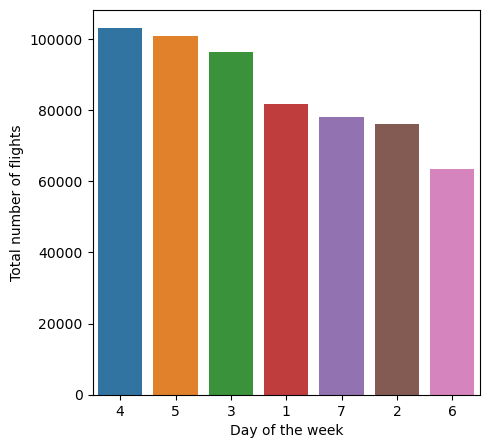

In [11]:
# Plot 3: Countplot that shows the total flights per day of the week
f, ax = plt.subplots()
sb.countplot(x = data_df['DAY_OF_WEEK'], order = data_df['DAY_OF_WEEK'].value_counts().index)
f.set_size_inches(5,5)
plt.ylabel("Total number of flights")
plt.xlabel("Day of the week")
plt.show()

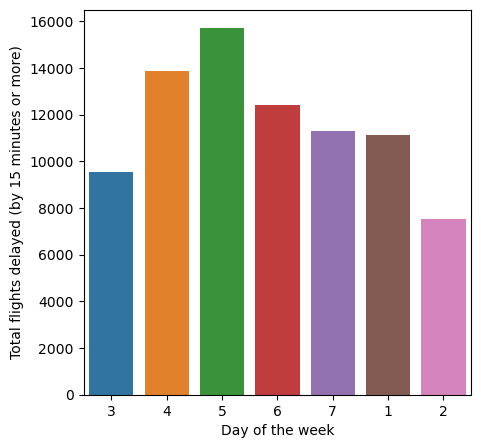

In [12]:
# Plot 4: Countplot that shows total delayed flights by 15 minutes or more
f, ax = plt.subplots()
sb.countplot(x = data_df[data_df['DEP_DEL15'] == 1]['DAY_OF_WEEK'])
f.set_size_inches(5,5)
plt.ylabel("Total flights delayed (by 15 minutes or more)")
plt.xlabel("Day of the week")
plt.show()

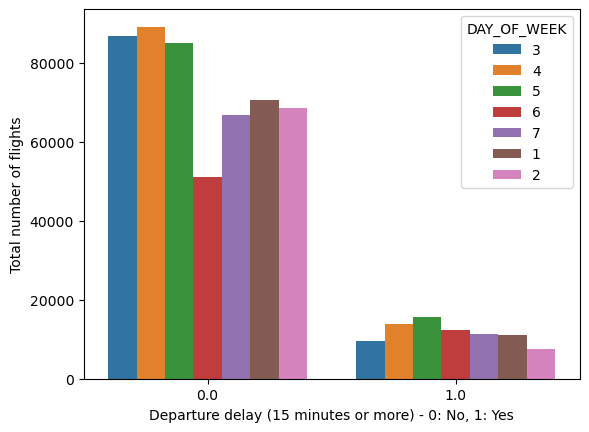

In [13]:
# Plot 5: Countplot that shows total delayed flights by 15 minutes or more by each day of the week
sb.countplot(x = data_df['DEP_DEL15'], hue = data_df['DAY_OF_WEEK'])
plt.ylabel("Total number of flights")
plt.xlabel("Departure delay (15 minutes or more) - 0: No, 1: Yes")
plt.show()

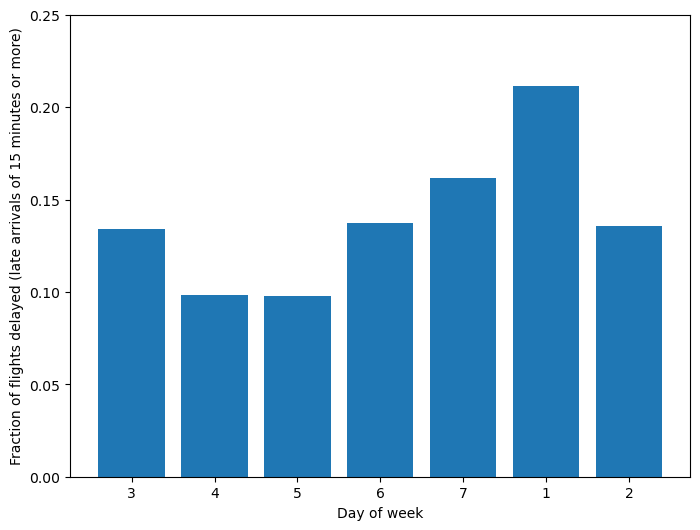

In [14]:
# Plot 6: Bar plot that shows the fraction of flights with arrival delays of 15 minutes or more each day of the week
figure(num = None, figsize=(8, 6))
plt.bar(x = data_df['DAY_OF_WEEK'].unique(), height = data_df.groupby(['DAY_OF_WEEK'])['ARR_DEL15'].mean())
plt.ylim([0, 0.25])
plt.xlabel('Day of week')
plt.ylabel('Fraction of flights delayed (late arrivals of 15 minutes or more)')
plt.show()

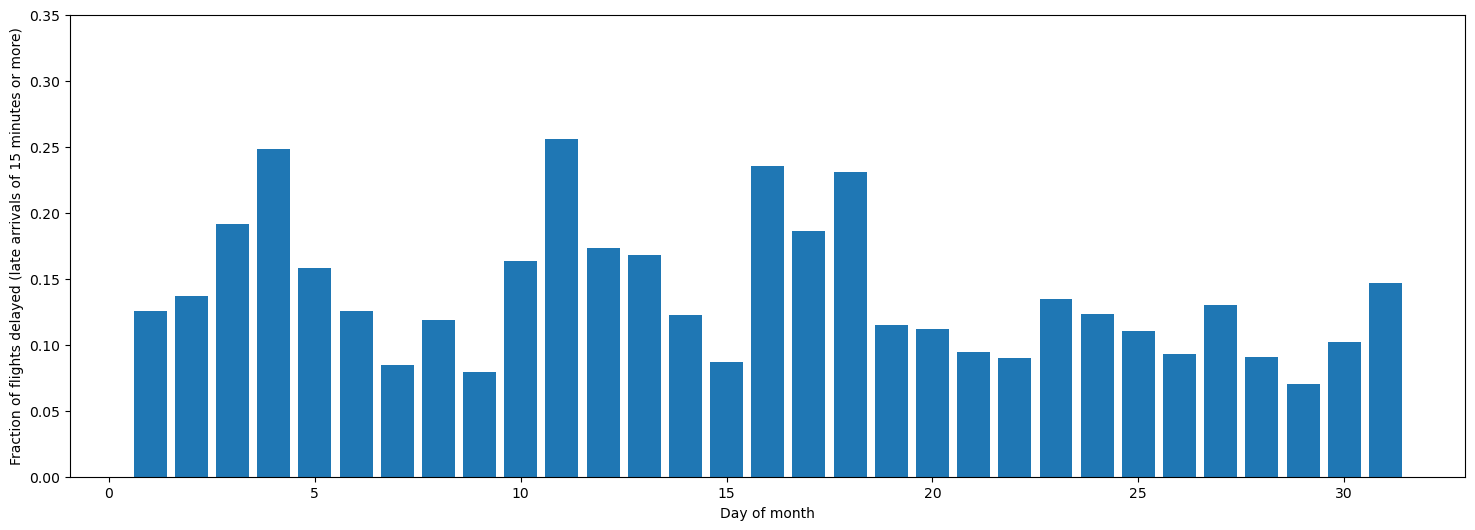

In [15]:
# Plot 7: Bar plot that shows the fraction of flights with arrival delays of 15 minutes or more each day of the month
figure(num = None, figsize = (18, 6))
plt.bar(x = data_df['DAY_OF_MONTH'].unique(), height = data_df.groupby(['DAY_OF_MONTH'])['ARR_DEL15'].mean())
plt.ylim([0, 0.35])
plt.xlabel('Day of month')
plt.ylabel('Fraction of flights delayed (late arrivals of 15 minutes or more)')
plt.show()

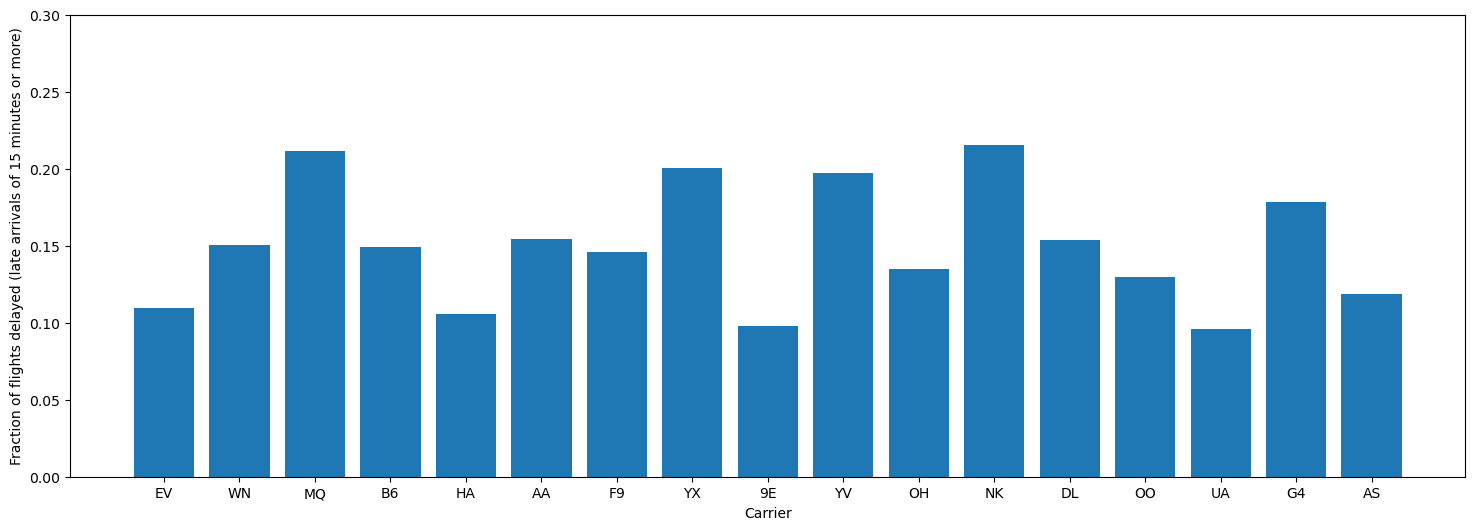

In [16]:
# Plot 8: Bar plot that shows the fraction of flights with arrival delays of 15 minutes or more per airline
figure(num=None, figsize=(18, 6))
plt.bar(x = data_df['OP_UNIQUE_CARRIER'].unique(), height = data_df.groupby(['OP_UNIQUE_CARRIER'])['ARR_DEL15'].mean())
plt.ylim([0, 0.3])
plt.xlabel('Carrier')
plt.ylabel('Fraction of flights delayed (late arrivals of 15 minutes or more)')
plt.show()

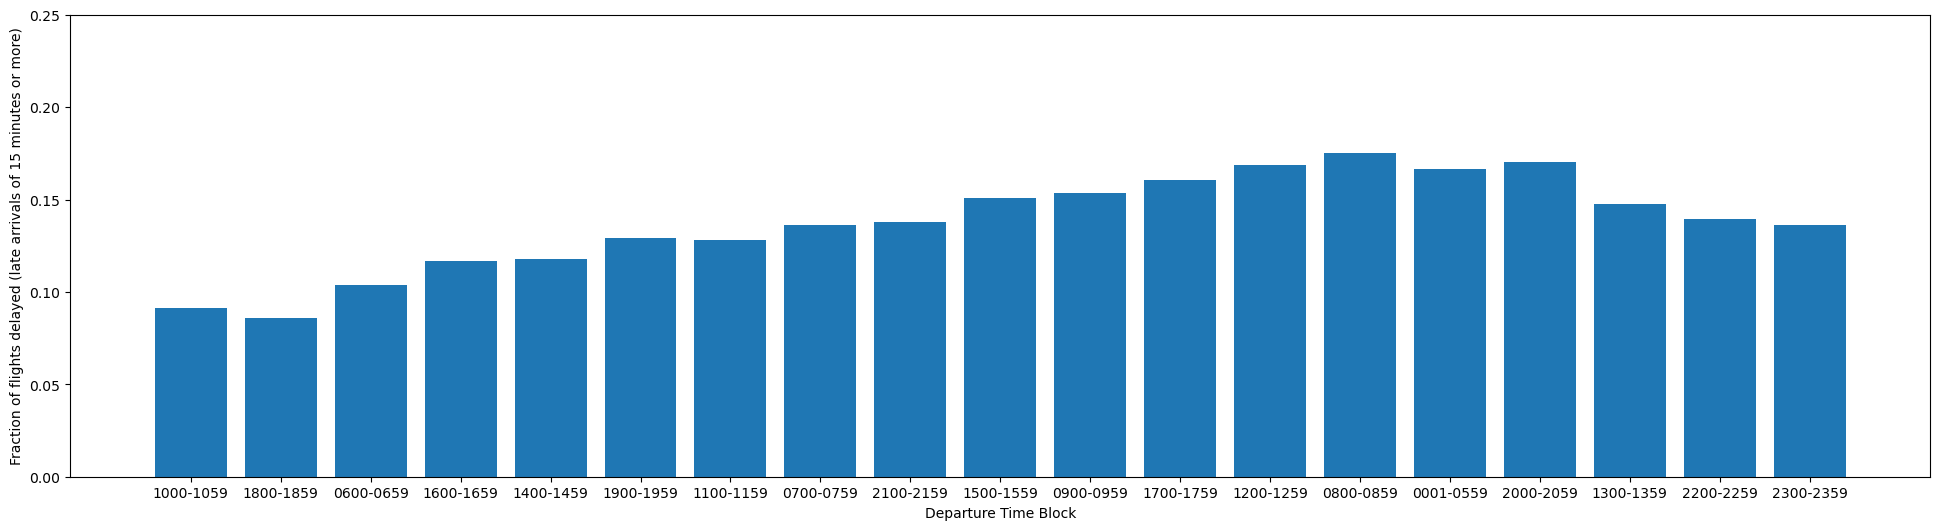

In [17]:
# Plot 9: Bar plot that shows the fraction of flights with arrival delays of 15 minutes or more per departure time-block
figure(num=None, figsize=(24, 6))
plt.bar(x = data_df['DEP_TIME_BLK'].unique(), height = data_df.groupby(['DEP_TIME_BLK'])['ARR_DEL15'].mean())
plt.ylim([0., 0.25])
plt.xlabel('Departure Time Block')
plt.ylabel('Fraction of flights delayed (late arrivals of 15 minutes or more)')
plt.show()

#### Departure Time Blocks (*sorted by descending order of mean arrival delays*)

In [18]:
data_df.groupby(['DEP_TIME_BLK'])['ARR_DEL15'].mean().sort_values(ascending = False)

DEP_TIME_BLK
1800-1859    0.174978
2000-2059    0.170450
1700-1759    0.168529
1900-1959    0.166508
1600-1659    0.160697
1500-1559    0.153775
1400-1459    0.151003
2100-2159    0.147427
2200-2259    0.139575
1300-1359    0.137736
2300-2359    0.136193
1200-1259    0.136144
1000-1059    0.129061
1100-1159    0.127851
0900-0959    0.117734
0800-0859    0.116706
0700-0759    0.103590
0001-0559    0.091298
0600-0659    0.085776
Name: ARR_DEL15, dtype: float64

#### The lowest and Highest ratio of delayed flights by Destination (*in descending order*)


In [19]:
# Delayed_norm['DEST'] = data_df['DEST']
data_df.groupby(['DEST'])['ARR_DEL15'].mean().sort_values(ascending = False)

DEST
PPG    0.444444
ADQ    0.360000
RIW    0.340000
SIT    0.333333
OTH    0.333333
         ...   
LWS    0.046875
TWF    0.044944
DVL    0.021277
OWB    0.000000
STC    0.000000
Name: ARR_DEL15, Length: 350, dtype: float64

#### Lowest and Highest ratio of delayed flights by Origin (*in descending order*)

In [20]:
# Delayed_norm['ORIGIN'] = data_df['ORIGIN']
data_df.groupby(['ORIGIN'])['ARR_DEL15'].mean().sort_values(ascending = False)

ORIGIN
SHR    0.486486
ADK    0.444444
PSM    0.400000
STC    0.384615
OTH    0.380952
         ...   
BTM    0.034483
LWS    0.031250
JMS    0.027397
UIN    0.000000
COD    0.000000
Name: ARR_DEL15, Length: 351, dtype: float64

### Observations and Insights
---
- **Total Flight Distribution**: `Day 4` (Wednesday) and `Day 5` (Thursday) represent the days with the maximum number of flights based on the sample dataset. Surprisingly, `Day 6` (Saturday), a weekend has one of the lowest flight volumes.<br>
- **Flight Delay Patterns**: The data analysis of the sample dataset provides some interesting insights related to the departure and arrival delays of flights, each of which is measured for a minimum delay of `15 minutes or more`, as outlined below:<br>
> 1. `Day 5` (*Thursday*) represents the day with the maximum number of flight departures that are delayed. <br>
> 2. `Day 4` (*Wednesday*) has the highest number of non-delayed flights based on the dataset.<br>
> 3. `Day 1` (*Sunday*) represents the day with the highest proportion of flights with arrival delays despite being one of the lower volume traffic days in terms of airplane traffic.
- **Bar Plot Analysis**: Bar Plots are used to analyze the relationship of flight delays across three specific paramaters as below:<br>
> 1. *By Day of Month*: The 4th and 11th of the month represent the days with the maximum proportion of flights arriving late. <br>
> 2. *By Operating Carrier*: NK and MQ airline carriers have the maximum proportion of their flights delayed. The airlines with the least proportion of their flights arriving late are UA and 9E.
> 3. *By Departure Time Block*: The early evening hours of `6 pm to 7 pm` has the maximum number of arrival flighte getting delayed pointing to a spike in traffic at airports consistently. On the contrary, the morning hour of `6 am to 7 am` has the least amount of delays. <br>
- **Delays by Destination and Origin**: The following insights can be drawn based on delays across airports from the dataset:<br>
> 1. *By Destination*: `PPG` (Pago Pago International Airport) has the highest proportion of flights arriving late at almost *45%*!
> 2. *By Origin*: `SHR` (Sheridan Airport, Wyoming) has the highest proportion of flights departing late at almost *49%*! On the contrary, `COD` (Yellowstone Regional Airport) has zero delays!
---